In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# aesthetics
sns.set(style="whitegrid")


In [20]:
df = pd.read_csv("Global_Superstore2.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [21]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [24]:
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [25]:
df.drop_duplicates(inplace=True)


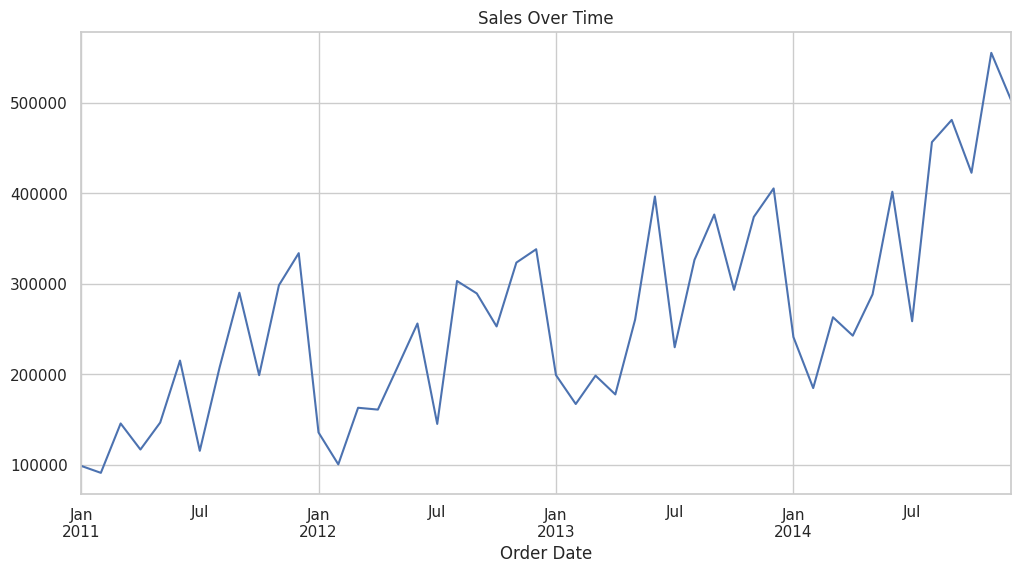

In [32]:
sales_by_month = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
sales_by_month.plot(kind='line', figsize=(12,6))
plt.title("Sales Over Time")
plt.savefig("sales_over_time.png", dpi=300)
plt.show()


### 📈 Figure 1: Sales Over Time

**Insights:**
- Sales show a clear upward trend over time, indicating overall business growth.
- Seasonal peaks suggest higher demand during certain months (likely year-end).
- Periodic dips may indicate off-season demand or market slowdowns.


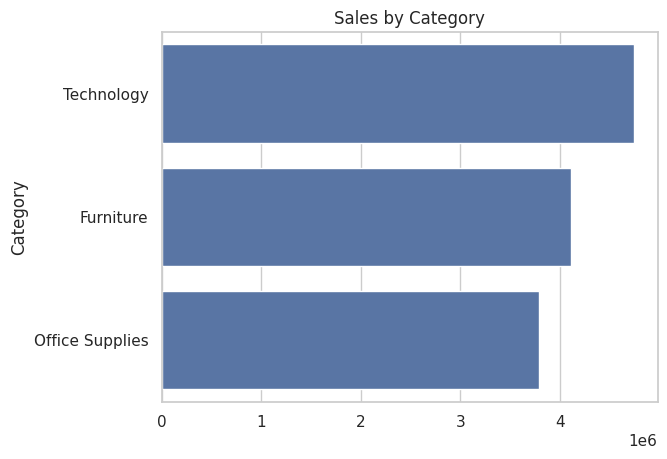

In [33]:
top_cat = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=top_cat.values, y=top_cat.index)
plt.title("Sales by Category")
plt.savefig("sales_by_category.png", dpi=300)
plt.show()


### 📊 Figure 2: Sales by Category

**Insights:**
- Technology is the highest-selling category, contributing the most to revenue.
- Furniture shows strong sales but may have lower margins.
- Office Supplies represents a high-volume, low-value category.


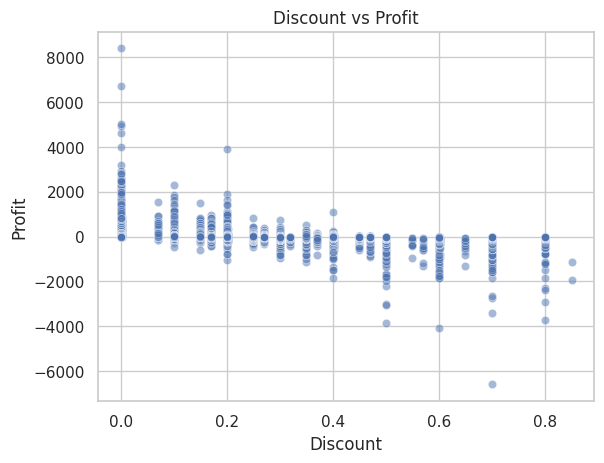

In [34]:
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title("Discount vs Profit")
plt.savefig("discount_vs_profit.png", dpi=300)
plt.show()


### 🔍 Figure 3: Discount vs Profit

**Insights:**
- Higher discounts are linked to lower or negative profits.
- Orders with minimal discounts tend to be more profitable.
- Excessive discounting negatively impacts overall profitability.


In [29]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)


Total Sales: 12642501.909880001
Total Profit: 1467457.29128


In [30]:
avg_order = df.groupby('Order ID')['Sales'].sum().mean()
print("AOV:", avg_order)


AOV: 504.99308607469555


### 💡 Key Insights
- Asia region shows highest revenue.
- High discount orders often generate negative profit.
- Office Supplies category has lower profitability.


In [31]:
df.to_csv("superstore2_clean.csv", index=False)
